In [21]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
from nltk.corpus import stopwords

In [24]:
from nltk.stem import PorterStemmer

In [25]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [32]:
df1 = pd.read_csv('C:/NEW/ITOM6219-predictive modeling/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
#df1.info()
#df1.describe()
df1.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [85]:
df = df1[df1['Department Name']=='Tops']
df=df.drop(['Unnamed: 0','Clothing ID','Title','Division Name','Department Name'], axis=1)

In [86]:
# fill NA values by space
df['Review Text'] = df['Review Text'].fillna('')

In [87]:
def identify_tokens(row):
    review = row['Review Text']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['Review Text'] = df.apply(identify_tokens, axis=1)

In [88]:
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['Review Text']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

df['Review Text'] = df.apply(remove_stops, axis=1)

In [89]:
def rejoin_words(row):
    my_list = row['Review Text']
    joined_words = ( " ".join(my_list))
    return joined_words

df['Review Text'] = df.apply(rejoin_words, axis=1)

In [90]:
# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
df['Word Counts'] = df['Review Text'].apply(wordcounts)
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Word Counts
4,47,This shirt flattering due adjustable front tie...,5,1,6,Blouses,"{'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl..."
6,39,I aded basket hte last mintue see would look l...,5,1,1,Knits,"{'aded': 1, 'baggy': 1, 'basket': 1, 'bummer':..."
7,39,I ordered carbon store pick ton stuff always t...,4,1,4,Knits,"{'already': 1, 'also': 1, 'always': 1, 'big': ..."
17,41,Took chance blouse glad crazy blouse photograp...,5,1,0,Blouses,"{'blouse': 2, 'ca': 1, 'chance': 1, 'clean': 1..."
20,33,If product petite would get petite regular lit...,4,1,2,Blouses,"{'back': 1, 'bough': 1, 'fits': 1, 'fitting': ..."


In [92]:
# Rating of 4 or higher -> positive, while the ones with 
# Rating of 2 or lower -> negative 
# Rating of 3 -> neutral
df = df[df['Rating'] != 3]
df['SentimentR'] = df['Rating'] >=4
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Word Counts,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,SentimentR
4,47,This shirt flattering due adjustable front tie...,5,1,6,Blouses,"{'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...",0.9062,0.514,0.000,0.486,Positive,True
6,39,I aded basket hte last mintue see would look l...,5,1,1,Knits,"{'aded': 1, 'baggy': 1, 'basket': 1, 'bummer':...",0.6361,0.827,0.048,0.125,Positive,True
7,39,I ordered carbon store pick ton stuff always t...,4,1,4,Knits,"{'already': 1, 'also': 1, 'always': 1, 'big': ...",0.5709,0.832,0.042,0.126,Positive,True
17,41,Took chance blouse glad crazy blouse photograp...,5,1,0,Blouses,"{'blouse': 2, 'ca': 1, 'chance': 1, 'clean': 1...",0.9460,0.423,0.116,0.461,Positive,True
20,33,If product petite would get petite regular lit...,4,1,2,Blouses,"{'back': 1, 'bough': 1, 'fits': 1, 'fitting': ...",0.7964,0.740,0.000,0.260,Positive,True


I splitted customer review sentences of woman tops from an e-commerce website into words and count unique words showing in their reviews. I then created a sentiment based on rating. Rating higher than 3 means general positive feedback and lower than 3 means negative feedback.

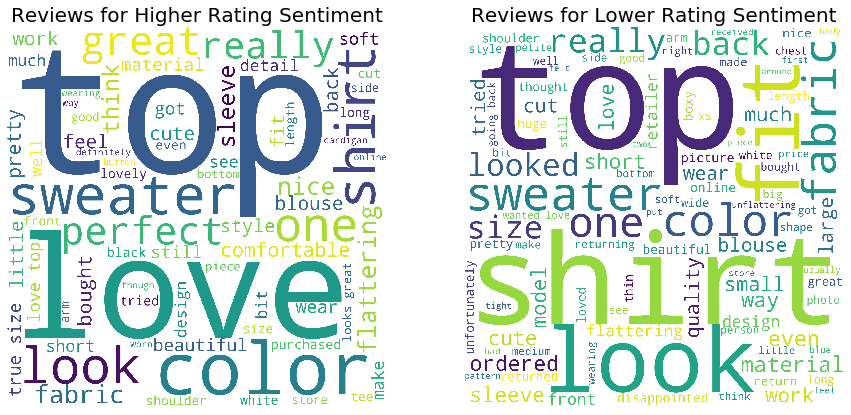

In [54]:
mlreview = ' '.join([text for text in df['Review Text'][df['SentimentR']==True]])
plt.rcParams['figure.figsize'] = (15, 15)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 70).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Higher Rating Sentiment', fontsize = 20)

pyreview = ' '.join([text for text in df['Review Text'][df['SentimentR']==False]])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(pyreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Lower Rating Sentiment', fontsize = 20)

plt.show()

Because we want to help to improve the insufficient part of this ecommerce website, we dig into the keywords for negative sentiment and find that many customers aren’t satisfied about the shirt and they commented that tops didn’t fit them well.

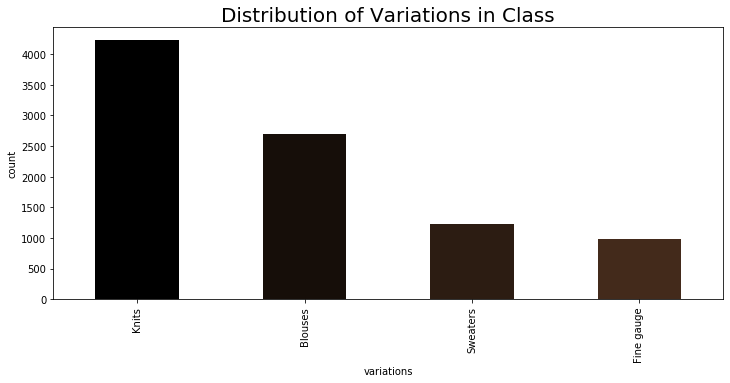

In [71]:
color = plt.cm.copper(np.linspace(0, 1, 15))
df['Class Name'].value_counts().plot.bar(color = color, figsize = (12, 5))
plt.title('Distribution of Variations in Class', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

According to the distribution of class within tops clothes, we can find that blouses and sweaters aren’t the most popular clothes but are still of great importance. The ecommerce website needs to not only focus on knits but also pay more attention to shirts and sweaters to improve their performance.

In [56]:
ratings = df['SentimentR'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Sentiment')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

From the pie chart , the pink part stands for positive one and vice versa and we can see that the ecommerce website did a great job.

In [94]:
from sklearn.decomposition import LatentDirichletAllocation
count_vect = CountVectorizer(max_df=0.8, min_df=2)
doc_term_matrix = count_vect.fit_transform(df['Review Text'].values.astype('U'))
LDA = LatentDirichletAllocation(n_components=4, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [95]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

set
detached
anticipate
somewhere
distraction
girls
swim
recommendation
wrists
adequately


In [96]:
first_topic = LDA.components_[0]

In [97]:
top_topic_words = first_topic.argsort()[-10:]

In [98]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

loved
tried
looked
store
cute
shirt
wear
like
one
top


In [99]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['loved', 'tried', 'looked', 'store', 'cute', 'shirt', 'wear', 'like', 'one', 'top']


Top 10 words for topic #1:
['little', 'large', 'love', 'wear', 'like', 'would', 'fit', 'small', 'size', 'top']


Top 10 words for topic #2:
['perfect', 'this', 'soft', 'wear', 'shirt', 'color', 'jeans', 'top', 'great', 'love']


Top 10 words for topic #3:
['looks', 'this', 'nice', 'back', 'really', 'soft', 'color', 'love', 'like', 'sweater']




In order to further explore the problem, I clustered customer reviews into 4 topics and did some topic analysis. The top 10 words for these 4 topics are shown below.

In [100]:
topic_values = LDA.transform(doc_term_matrix)

In [101]:
a = topic_values.argmax(axis=1)

In [102]:
df['Topic'] = a

In [103]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Word Counts,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,SentimentR,Topic
4,47,This shirt flattering due adjustable front tie...,5,1,6,Blouses,"{'adjustable': 1, 'cardigan': 1, 'due': 1, 'fl...",0.9062,0.514,0.000,0.486,Positive,True,2
6,39,I aded basket hte last mintue see would look l...,5,1,1,Knits,"{'aded': 1, 'baggy': 1, 'basket': 1, 'bummer':...",0.6361,0.827,0.048,0.125,Positive,True,2
7,39,I ordered carbon store pick ton stuff always t...,4,1,4,Knits,"{'already': 1, 'also': 1, 'always': 1, 'big': ...",0.5709,0.832,0.042,0.126,Positive,True,2
17,41,Took chance blouse glad crazy blouse photograp...,5,1,0,Blouses,"{'blouse': 2, 'ca': 1, 'chance': 1, 'clean': 1...",0.9460,0.423,0.116,0.461,Positive,True,1
20,33,If product petite would get petite regular lit...,4,1,2,Blouses,"{'back': 1, 'bough': 1, 'fits': 1, 'fitting': ...",0.7964,0.740,0.000,0.260,Positive,True,1


In [83]:
topic = df['Topic'][df['SentimentR']==False].value_counts()

label_topic =topic.index
size_topic = topic.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

topic_piechart = go.Pie(labels = label_topic,
                         values = size_topic,
                         marker = dict(colors = colors),hole = 0.3)

df = [topic_piechart]

layout = go.Layout(
           title = 'Topic Distribution of Sentiment')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

Among the negative sentiment, I found that most of our customers complained about topic 1. Topic 1 is about the size of tops clothes.And when I digged into topic 1, I found that customers complained that tops are too small and they are not satisfied for the shirt. Therefore, the website may need to add some description about the size if certain clothes are smaller or larger than common size and since shirts have high requirement for fabric, color and size, the website need to pose more actual wearing pictures of models to give customers more information.

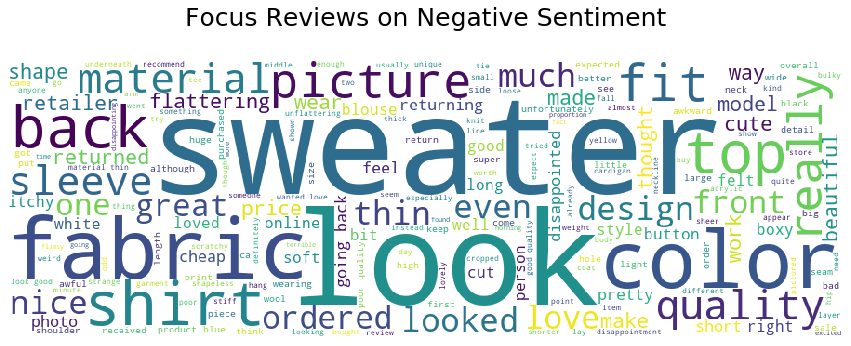

In [106]:
tp = df['Review Text'][
  (df['SentimentR'] == False)&
  ((df['Topic'] == 3))
]
plt.subplots(figsize=(15,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(tp))
plt.imshow(wordcloud)
plt.title('Focus Reviews on Negative Sentiment\n',size=25)
plt.axis('off')
plt.show()

For the topic three that lots of customers also complained about, I found that the sweater’s fabric isn’t comfortable for some customers and they don’t look great after putting it on because of the disadvantages of online shopping. Therefore, the website may need to add more description about the clothes material and post more objective modeling pictures for sweaters.

In [498]:
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['SentimentR']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['SentimentR']

In [499]:
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [500]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2.head(20)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Word Counts,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,SentimentR,Topic,Logistic Regression
19218,35,I love dress gentle blue lace silhouette seen ...,5,1,0,Dresses,"{'blue': 1, 'chest': 1, 'dress': 2, 'found': 1...",0.7964,0.647,0.000,0.353,Positive,True,0,True
3530,51,Beautiful choice beautiful fit daughter slim body,5,1,2,Knits,"{'beautiful': 2, 'body': 1, 'choice': 1, 'daug...",0.8834,0.280,0.000,0.720,Positive,True,0,True
15663,25,If shaped anything like size quite bit one tri...,4,1,0,Dresses,"{'anything': 1, 'athletic': 1, 'bit': 1, 'broa...",0.6124,0.848,0.000,0.152,Positive,True,0,True
21310,33,This top cute spectacular quality size time al...,5,1,1,Blouses,"{'almost': 1, 'around': 1, 'back': 2, 'better'...",0.9413,0.594,0.000,0.406,Positive,True,0,True
15154,56,First saw poncho petite blog reading reviews h...,5,1,2,Sweaters,"{'blog': 1, 'bum': 1, 'cable': 1, 'chicago': 1...",0.9674,0.678,0.000,0.322,Positive,True,2,True
3994,42,This dress beautiful fit lbs medium regular fi...,4,1,1,Dresses,"{'arrived': 1, 'back': 1, 'beautiful': 1, 'bot...",0.8910,0.522,0.131,0.347,Positive,True,2,True
8250,47,I love print shirt feminine pretty material so...,5,1,15,Knits,"{'addition': 1, 'feminine': 1, 'great': 1, 'lo...",0.9100,0.489,0.000,0.511,Positive,True,1,True
1417,40,This dress perfection extremely comfortable ve...,5,1,1,Dresses,"{'allover': 1, 'busted': 1, 'clothing': 1, 'co...",0.9706,0.372,0.063,0.565,Positive,True,0,True
17580,44,I late find size petite boo tried regular sizi...,4,1,0,Dresses,"{'boo': 1, 'casually': 1, 'could': 1, 'definit...",0.9423,0.718,0.000,0.282,Positive,True,0,True
7819,47,This shell worn casual dressy depending paired...,4,1,0,Knits,"{'casual': 1, 'depending': 1, 'dressy': 1, 'en...",0.4215,0.410,0.180,0.410,Positive,True,1,True
